 # `kmeans(data)`

#### `def kmeans_more(data, nk=10, niter=100)`
  - `returns 3 items : best_k, vector of corresponding labels for each given sample, centroids for each cluster`

#### `def kmeans(data, nk=10, niter=100)`
  - `returns 2 items: best_k, vector of corresponding labels for each given sample`

# Requirements
- where data is an MxN numpy array
- This should return
  - an integer K, which should be programmatically identified
  - a vector of length M containing the cluster labels
- `nk` is predefined as 10, which is the max number of clusters our program will test. So given a data set, the best k would be less than or equal to nk but greater than 1. 
- `niter` is the number of iterations before our  algorithm "gives up", if it doesn't converge to a centroid after 100 iterations, it will just use the centroids it has computed the most recently
- `kmeans_more()` is just `kmeans` but also returns the set of centroids. This is useful for visualization or plotting purposes. 

In [1]:
# x_kmeans returns error per k
# kmeans returns k and data labels
from KMeans import kmeans, kmeans_more, get_angle_between_3points

# A list of four sets of 2d points
from oldsamplesgen import gen_set1
# helper plotting functions visualize what kmeans is doing
from kmeansplottinghelper import initial_plots, colored_plots, eval_plots

import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
# Load 4 data sets of 2d points with clusters [2, 3, 4, 5] respectively 
pointset = gen_set1()

In [3]:
# let's get one of them to test for our k means 

samples = pointset[3]
# Make sure to shuffle the data, as they sorted by label
np.random.shuffle(samples)

print()
print("(M x N) row = M (number of samples) columns = N (number of features per sample)")
print("Shape of array:", samples.shape)

print()
print("Which means there are", samples.shape[0], "samples and", samples.shape[1], "features per sample")

print()
print("Let's run our kmeans implementation")

#----------------------------------------------
k, labels = kmeans(samples)
#----------------------------------------------

print()
print()
print("Proposed number of clusters:", k)

print("Labels shape:")
print(labels.shape)

print("Print all the labels:")
print(labels)


(M x N) row = M (number of samples) columns = N (number of features per sample)
Shape of array: (315, 2)

Which means there are 315 samples and 2 features per sample

Let's run our kmeans implementation
>>>>>>>>>>

Proposed number of clusters: 5
Labels shape:
(315,)
Print all the labels:
[4 2 0 1 3 3 4 1 2 2 3 4 3 4 1 4 3 1 4 0 0 3 4 3 3 3 1 3 0 2 1 2 1 0 1 2 4
 0 0 1 0 4 3 0 1 0 4 1 3 1 1 2 3 2 0 0 2 4 2 1 4 1 2 0 4 1 0 0 2 1 2 4 1 1
 2 1 1 2 4 1 4 2 1 3 4 2 4 3 1 1 3 4 2 4 4 1 3 1 2 1 1 2 4 4 4 0 0 3 3 3 3
 3 0 1 4 4 4 1 3 3 1 3 1 4 1 1 1 2 0 1 1 1 3 4 3 2 1 4 2 0 4 3 3 3 1 4 0 1
 3 1 3 4 1 1 4 3 1 0 3 0 1 2 4 3 4 0 0 1 0 4 1 3 1 3 1 1 4 3 0 1 0 1 4 1 0
 2 3 3 1 4 2 2 2 1 1 2 3 0 0 4 3 3 0 1 1 0 3 1 0 2 1 1 0 1 4 0 3 0 3 4 0 3
 3 1 1 4 1 4 0 3 3 3 3 4 1 3 0 0 3 3 2 3 1 1 0 0 4 3 0 4 1 0 1 0 2 4 0 4 4
 0 1 4 0 0 3 1 1 1 4 0 4 1 2 1 1 1 4 3 3 0 1 3 2 1 2 3 2 2 3 2 4 3 3 3 1 4
 1 4 3 1 3 0 1 2 3 1 4 0 0 3 4 1 2 1 1]


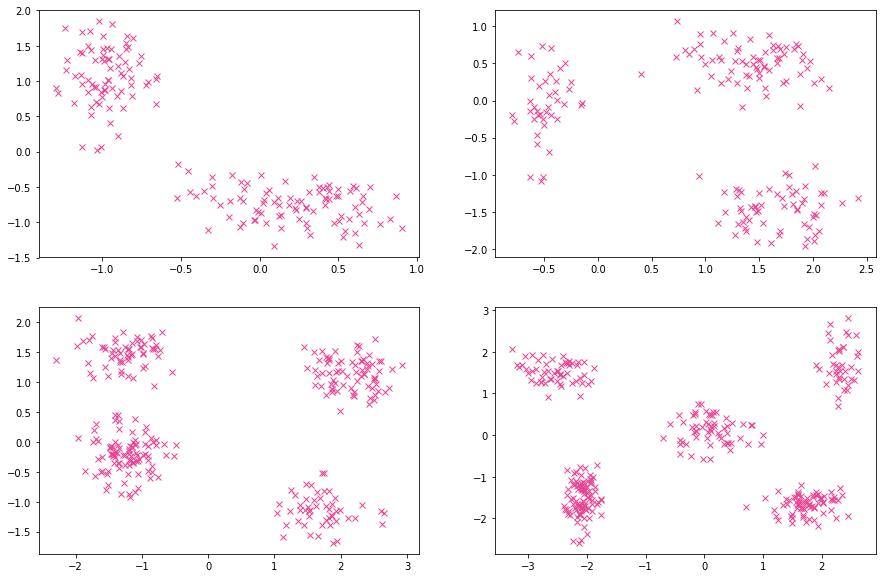

In [4]:
# The synthetic dataset looks like this
# They look like this
initial_plots(pointset)

In [5]:
# Plot a kmeans implementation given 4 sets of points
def plot_sample_kmeans_more(pointset):
    idata, ilabels, icentroids, inclusters = [], [], [], []

    for points in pointset:
        data = points
        np.random.shuffle(data)
        nclusters, labels, centroids = kmeans_more(data)    
        idata.append(data)
        ilabels.append(labels)
        icentroids.append(centroids)
        inclusters.append(nclusters)

    colored_plots(idata, ilabels, icentroids, inclusters)

In [6]:
# returns the set the evaluated ks for each set
def test_final_kmeans(pointset):
    ks = []
    
    for i, points in enumerate(pointset):
        data = pointset[i]
        #Make sure to shuffle the data, as they sorted by label
        np.random.shuffle(data)
        k, _ = kmeans(data)
        ks.append(k)
    return ks

In [7]:
ks = test_final_kmeans(pointset)
print()
# Should be [2, 3, 4, 5]
print("Proposed k for each set:", ks)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Proposed k for each set: [2, 3, 4, 5]


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

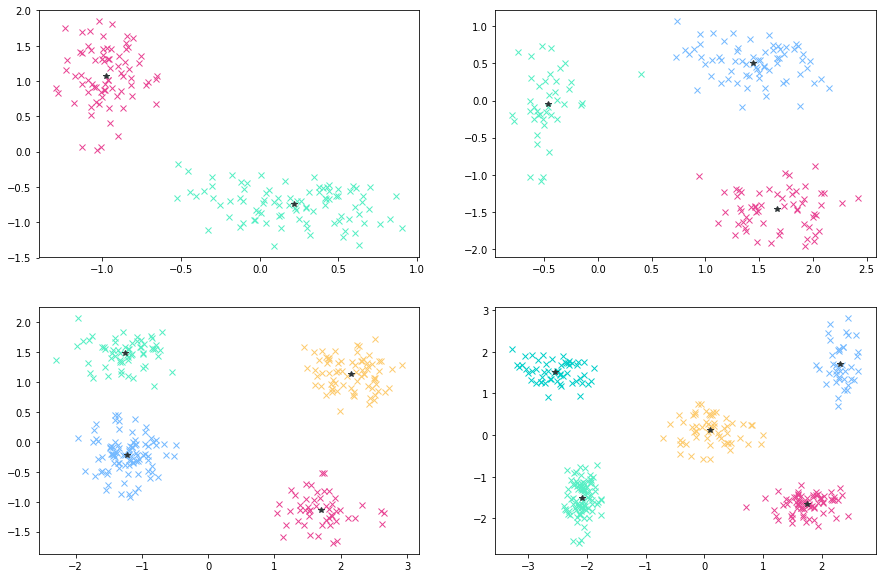

In [8]:
plot_sample_kmeans_more(pointset)

In [9]:
# test if our "compute angle between three points" function is working
a = get_angle_between_3points([1, 2], [1, 1], [2, 1])
b = get_angle_between_3points([1, 1], [2, 1], [3, 1])

assert a, 90.0
assert b, 180.0